In [1]:
import pandas as pd
import os
current_dir = os.getcwd()
current_dir
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")
current_dir = os.getcwd()
current_dir

You set a new current directory


'h:\\VScode\\March Group\\March_Team_Project'

In [ ]:
# Issue 16 and Issue 15
# Merge weather data with pollution data, ensure pollution data is filtered for locations and timeperiod.
# Merge on date and location
# Save the merged data to a new csv file
# load pollution data
pollution_data = pd.read_csv('Not_to_be_shared_to_repo\\pollution_us_2000_2016.csv.zip')
# count of records in pollution data
print(pollution_data.shape)
# load pollution filter "pollution_data_available.csv
# filter pollution data for locations and timeperiod
pollution_filter = pd.read_csv('Outputs/pollution_data_available.csv')
# count of records in pollution filter
print(pollution_filter.shape)
# filter pollution_data for location in polution_filter with date between years 2003 and 2016
pollution_data = pollution_data[pollution_data['Date Local'].str.contains('200[3-9]|201[0-6]')]
print(pollution_data.shape)
pollution_data = pollution_data[pollution_data['State'].isin(pollution_filter['State'])]
print(pollution_data.shape)
pollution_data

<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
C:\Users\pgold\AppData\Local\Temp\ipykernel_20432\1363903305.py:6: SyntaxWarning: invalid escape sequence '\p'
  pollution_data = pd.read_csv('Not_to_be_shared_to_repo\pollution_us_2000_2016.csv.zip')


(1746661, 29)
(29, 6)
(1472002, 29)
(1038692, 29)


In [35]:
# create a cleaned version of pollution data where any row with a null value is removed.
pollution_data_cleaned = pollution_data.dropna()
print(pollution_data_cleaned.shape)
#format city as capitals
pollution_data_cleaned['City'] = pollution_data_cleaned['City'].str.upper()
# rename Date Local to Date
pollution_data_cleaned.rename(columns={'Date Local':'Date'}, inplace=True)
#convert Date to datetime
pollution_data_cleaned['Date'] = pd.to_datetime(pollution_data_cleaned['Date'])
pollution_data_cleaned

(259822, 29)


C:\Users\pgold\AppData\Local\Temp\ipykernel_20432\740962649.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pollution_data_cleaned['City'] = pollution_data_cleaned['City'].str.upper()
C:\Users\pgold\AppData\Local\Temp\ipykernel_20432\740962649.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pollution_data_cleaned.rename(columns={'Date Local':'Date'}, inplace=True)
C:\Users\pgold\AppData\Local\Temp\ipykernel_20432\740962649.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
274660,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,PHOENIX,2003-01-01,Parts per billion,...,Parts per billion,4.333333,10.0,0,14.0,Parts per million,2.089474,4.6,5,52.0
274664,5,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,PHOENIX,2003-01-02,Parts per billion,...,Parts per billion,4.625000,10.0,6,14.0,Parts per million,1.737500,2.6,8,30.0
274668,9,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,PHOENIX,2003-01-03,Parts per billion,...,Parts per billion,4.625000,14.0,21,20.0,Parts per million,1.412500,2.9,23,33.0
274672,13,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,PHOENIX,2003-01-04,Parts per billion,...,Parts per billion,6.208333,13.0,1,19.0,Parts per million,2.275000,3.6,2,41.0
274676,17,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,PHOENIX,2003-01-05,Parts per billion,...,Parts per billion,4.458333,8.0,0,11.0,Parts per million,1.612500,3.1,0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745900,23843,48,309,1037,4472 Mazanec Rd,Texas,McLennan,WACO,2016-04-26,Parts per billion,...,Parts per billion,0.666667,1.1,0,1.0,Parts per million,0.100000,0.1,0,1.0
1745904,23847,48,309,1037,4472 Mazanec Rd,Texas,McLennan,WACO,2016-04-27,Parts per billion,...,Parts per billion,0.695000,1.1,0,1.0,Parts per million,0.100000,0.1,0,1.0
1745908,23851,48,309,1037,4472 Mazanec Rd,Texas,McLennan,WACO,2016-04-28,Parts per billion,...,Parts per billion,0.741667,1.3,14,1.0,Parts per million,0.129167,0.2,11,2.0
1745912,23855,48,309,1037,4472 Mazanec Rd,Texas,McLennan,WACO,2016-04-29,Parts per billion,...,Parts per billion,0.608696,1.0,18,1.0,Parts per million,0.200000,0.2,0,2.0


In [47]:
# load weather data on day and city
weather_data = pd.read_csv('Outputs/Us_Weather_Final_10km.zip')
# rename columns to match stations
weather_data = weather_data.rename(columns={'Station_ID':'StationId'})
# convert date to datetime current format yyyymmdd
weather_data['Date'] = weather_data['Date'].astype(str)
weather_data['Date'] = weather_data['Date'].apply(lambda x: x[:4] + '-' + x[4:6] + '-' + x[6:])
weather_data['Date'] = pd.to_datetime(weather_data['Date'])
# drop columns not needed
weather_data = weather_data.drop(columns=["Unnamed: 0", "Unnamed: 0.1"])
print(weather_data.shape)
weather_data

(265147, 15)


,StationId,Date,AWND,PGTM,TAVG,TMAX,TMIN,TSUN,WT01,WT04,WT09,WT11,WT16,WT18,WT22
0,USC00010764,2000-01-01,NaN,NaN,NaN,211.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00010764,2000-01-02,NaN,NaN,NaN,228.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00010764,2000-01-03,NaN,NaN,NaN,228.0,122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00010764,2000-01-04,NaN,NaN,NaN,200.0,-56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00010764,2000-01-05,NaN,NaN,NaN,111.0,-17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265142,USW00094789,2016-12-27,65.0,NaN,121.0,167.0,50.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
265143,USW00094789,2016-12-28,58.0,NaN,59.0,61.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265144,USW00094789,2016-12-29,54.0,NaN,40.0,89.0,-21.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
265145,USW00094789,2016-12-30,76.0,NaN,41.0,61.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# load Us_Stations_with_City_10km.csv
stations = pd.read_csv('Outputs/Us_Stations_with_City_10km.csv')
# format StationId as capitals
stations['StationId'] = stations['StationId'].str.upper()
# format city as capitals
stations['City'] = stations['City'].str.upper()
print(stations.shape)
stations

(607, 8)


,StationId,Latitude,Longitude,Elevation,Name,CountryCode,City,CityDistance
0,US10CEDA014,42.3951,-97.0319,438.0,LAUREL 3.9 ESE,US,CONCORD,3.736847
1,US10DIXO001,42.4273,-96.9774,463.0,WAYNE 13.7 NNE,US,CONCORD,4.918946
2,US10DOUG025,41.3639,-96.1558,352.3,BENNINGTON 0.1 ESE,US,WASHINGTON,5.707573
3,US10DOUG051,41.3553,-96.2138,341.1,BENNINGTON 3.0 W,US,WASHINGTON,4.733762
4,US10DOUG054,41.3121,-96.1779,341.4,OMAHA 13.1 WNW,US,WASHINGTON,9.820842
...,...,...,...,...,...,...,...,...
602,USW00093874,30.4122,-89.0808,4.9,GULFPORT - BILOXI AP,US,LONG BEACH,9.902063
603,USW00093928,32.7667,-96.7833,195.1,DALLAS WBO,US,DALLAS,3.359899
604,USW00093972,39.1000,-94.5833,294.1,KANSAS CITY,US,KANSAS CITY,3.653845
605,USW00094701,42.3500,-71.0667,6.1,BOSTON CITY WSO,US,BOSTON,3.787921


In [49]:
# merge weather data with stations on station id
weather_data = pd.merge(weather_data, stations, on='StationId')
print(weather_data.shape)
# set all null values to 0
weather_data = weather_data.fillna(0)
# rename columns Latitude and Longitude to WS_Latitude and WS_Longitude
weather_data = weather_data.rename(columns={'Latitude':'WS_Latitude', 'Longitude':'WS_Longitude', "Elevation": "WS_Elevation", "Name": "WS_Name"})

weather_data

(265147, 22)


,StationId,Date,AWND,PGTM,TAVG,TMAX,TMIN,TSUN,WT01,WT04,...,WT16,WT18,WT22,WS_Latitude,WS_Longitude,WS_Elevation,WS_Name,CountryCode,City,CityDistance
0,USC00010764,2000-01-01,0.0,0.0,0.0,211.0,89.0,0.0,0.0,0.0,...,0.0,0.0,0.0,33.3936,-87.0067,132.6,BESSEMER 3 WSW,US,CONCORD,8.742848
1,USC00010764,2000-01-02,0.0,0.0,0.0,228.0,89.0,0.0,0.0,0.0,...,0.0,0.0,0.0,33.3936,-87.0067,132.6,BESSEMER 3 WSW,US,CONCORD,8.742848
2,USC00010764,2000-01-03,0.0,0.0,0.0,228.0,122.0,0.0,0.0,0.0,...,0.0,0.0,0.0,33.3936,-87.0067,132.6,BESSEMER 3 WSW,US,CONCORD,8.742848
3,USC00010764,2000-01-04,0.0,0.0,0.0,200.0,-56.0,0.0,0.0,0.0,...,0.0,0.0,0.0,33.3936,-87.0067,132.6,BESSEMER 3 WSW,US,CONCORD,8.742848
4,USC00010764,2000-01-05,0.0,0.0,0.0,111.0,-17.0,0.0,0.0,0.0,...,0.0,0.0,0.0,33.3936,-87.0067,132.6,BESSEMER 3 WSW,US,CONCORD,8.742848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265142,USC00385362,2016-12-27,0.0,0.0,0.0,144.0,83.0,0.0,0.0,0.0,...,0.0,0.0,0.0,34.2492,-80.6697,57.9,LUGOFF 2NE,US,CAMDEN,5.645905
265143,USC00385362,2016-12-28,0.0,0.0,0.0,217.0,83.0,0.0,0.0,0.0,...,0.0,0.0,0.0,34.2492,-80.6697,57.9,LUGOFF 2NE,US,CAMDEN,5.645905
265144,USC00385362,2016-12-29,0.0,0.0,0.0,167.0,44.0,0.0,0.0,0.0,...,0.0,0.0,0.0,34.2492,-80.6697,57.9,LUGOFF 2NE,US,CAMDEN,5.645905
265145,USC00385362,2016-12-30,0.0,0.0,0.0,189.0,-6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,34.2492,-80.6697,57.9,LUGOFF 2NE,US,CAMDEN,5.645905


In [ ]:
# merge pollution data with weather data on date and location
merged_data = pd.merge(pollution_data_cleaned, weather_data, left_on=['Date', 'City'], right_on=['Date', 'City'], how='inner')
print(merged_data.shape)
merged_data

(205621, 49)


,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date,NO2 Units,...,WT11,WT16,WT18,WT22,WS_Latitude,WS_Longitude,WS_Elevation,WS_Name,CountryCode,CityDistance
0,373,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,PHOENIX,2003-04-06,Parts per billion,...,0.0,0.0,0.0,0.0,43.2386,-76.1964,114.9,BREWERTON LOCK 23,US,8.114212
1,3655,6,13,2,2956-A TREAT BOULEVARD,California,Contra Costa,CONCORD,2003-01-01,Parts per billion,...,0.0,0.0,0.0,0.0,33.3936,-87.0067,132.6,BESSEMER 3 WSW,US,8.742848
2,3655,6,13,2,2956-A TREAT BOULEVARD,California,Contra Costa,CONCORD,2003-01-01,Parts per billion,...,0.0,0.0,0.0,0.0,35.4136,-80.5639,204.2,CONCORD,US,6.990750
3,3655,6,13,2,2956-A TREAT BOULEVARD,California,Contra Costa,CONCORD,2003-01-01,Parts per billion,...,0.0,1.0,0.0,1.0,43.2050,-71.5025,103.0,CONCORD ASOS,US,5.419824
4,3659,6,13,2,2956-A TREAT BOULEVARD,California,Contra Costa,CONCORD,2003-01-02,Parts per billion,...,0.0,0.0,0.0,0.0,33.3936,-87.0067,132.6,BESSEMER 3 WSW,US,8.742848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205616,22111,48,113,69,1415 Hinton Street,Texas,Dallas,DALLAS,2016-03-30,Parts per billion,...,0.0,0.0,0.0,0.0,32.8383,-96.8358,147.5,DALLAS FAA AP,US,8.155589
205617,22115,48,113,69,1415 Hinton Street,Texas,Dallas,DALLAS,2016-03-31,Parts per billion,...,0.0,0.0,0.0,0.0,35.2672,-81.1436,213.4,GASTONIA,US,6.582411
205618,22115,48,113,69,1415 Hinton Street,Texas,Dallas,DALLAS,2016-03-31,Parts per billion,...,0.0,0.0,0.0,0.0,43.2356,-99.4342,658.4,GREGORY,US,6.752875
205619,22115,48,113,69,1415 Hinton Street,Texas,Dallas,DALLAS,2016-03-31,Parts per billion,...,0.0,0.0,0.0,0.0,45.2142,-91.8878,329.2,RIDGELAND 1NNE,US,7.624856


In [51]:
# drop columns not needed
merged_data = merged_data.drop(columns=["Unnamed: 0"])

#  display Percentage of null values in each column
null_values_percentage = merged_data.isnull().sum() / len(merged_data) * 100
null_values_percentage


State Code           0.0
County Code          0.0
Site Num             0.0
Address              0.0
State                0.0
County               0.0
City                 0.0
Date                 0.0
NO2 Units            0.0
NO2 Mean             0.0
NO2 1st Max Value    0.0
NO2 1st Max Hour     0.0
NO2 AQI              0.0
O3 Units             0.0
O3 Mean              0.0
O3 1st Max Value     0.0
O3 1st Max Hour      0.0
O3 AQI               0.0
SO2 Units            0.0
SO2 Mean             0.0
SO2 1st Max Value    0.0
SO2 1st Max Hour     0.0
SO2 AQI              0.0
CO Units             0.0
CO Mean              0.0
CO 1st Max Value     0.0
CO 1st Max Hour      0.0
CO AQI               0.0
StationId            0.0
AWND                 0.0
PGTM                 0.0
TAVG                 0.0
TMAX                 0.0
TMIN                 0.0
TSUN                 0.0
WT01                 0.0
WT04                 0.0
WT09                 0.0
WT11                 0.0
WT16                 0.0


In [ ]:
# Save merged to zip file
merged_data.to_csv('Outputs/Merged_Data_PG_1.zip', index=False)

In [59]:
# convert "State Code", "County Code", "Site Num" to object
merged_data[["State Code", "County Code", "Site Num"]] = merged_data[["State Code", "County Code", "Site Num"]].astype(str)

# produce list of numeric and bool columns
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64', 'bool']).columns
# drop WS_Latitude, WS_Longitude from numeric_columns
numeric_columns = numeric_columns.drop(['WS_Latitude', 'WS_Longitude'])

print(numeric_columns)
# produce correlation matrix of merged_data for columns in numeric_columns
correlation_matrix = merged_data[numeric_columns].corr()


Index(['NO2 Mean', 'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI', 'AWND', 'PGTM', 'TAVG',
       'TMAX', 'TMIN', 'TSUN', 'WT01', 'WT04', 'WT09', 'WT11', 'WT16', 'WT18',
       'WT22', 'WS_Elevation', 'CityDistance'],
      dtype='object')


In [60]:
# round all values in correlation matrix to 2 decimal places
correlation_matrix = correlation_matrix.round(2)
correlation_matrix

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,...,TSUN,WT01,WT04,WT09,WT11,WT16,WT18,WT22,WS_Elevation,CityDistance
NO2 Mean,1.00,0.88,0.04,0.88,-0.47,-0.27,0.06,-0.21,0.40,0.38,...,NaN,-0.01,0.02,-0.00,-0.01,0.02,0.04,0.01,-0.07,-0.03
NO2 1st Max Value,0.88,1.00,0.07,1.00,-0.27,-0.06,0.06,-0.03,0.35,0.35,...,NaN,-0.04,0.01,-0.00,-0.01,-0.00,0.02,-0.00,-0.06,-0.02
NO2 1st Max Hour,0.04,0.07,1.00,0.07,-0.17,-0.10,-0.17,-0.10,-0.01,-0.01,...,NaN,-0.01,0.00,-0.00,-0.00,-0.01,0.00,0.01,0.02,0.01
NO2 AQI,0.88,1.00,0.07,1.00,-0.27,-0.06,0.06,-0.03,0.35,0.35,...,NaN,-0.04,0.01,-0.00,-0.01,-0.00,0.02,-0.00,-0.06,-0.02
O3 Mean,-0.47,-0.27,-0.17,-0.27,1.00,0.90,0.04,0.83,-0.12,-0.09,...,NaN,-0.06,-0.03,-0.01,0.01,-0.03,-0.06,-0.03,0.01,0.00
O3 1st Max Value,-0.27,-0.06,-0.10,-0.06,0.90,1.00,0.06,0.94,-0.06,-0.02,...,NaN,-0.06,-0.03,-0.01,0.01,-0.04,-0.06,-0.02,0.00,0.01
O3 1st Max Hour,0.06,0.06,-0.17,0.06,0.04,0.06,1.00,0.05,0.04,0.04,...,NaN,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.01,-0.00
O3 AQI,-0.21,-0.03,-0.10,-0.03,0.83,0.94,0.05,1.00,-0.03,0.00,...,NaN,-0.06,-0.03,-0.01,0.01,-0.04,-0.05,-0.02,0.01,0.01
SO2 Mean,0.40,0.35,-0.01,0.35,-0.12,-0.06,0.04,-0.03,1.00,0.86,...,NaN,-0.04,0.02,-0.01,0.01,-0.02,0.02,0.00,-0.04,-0.09
SO2 1st Max Value,0.38,0.35,-0.01,0.35,-0.09,-0.02,0.04,0.00,0.86,1.00,...,NaN,-0.03,0.01,-0.01,0.01,-0.01,0.01,0.00,-0.06,-0.06


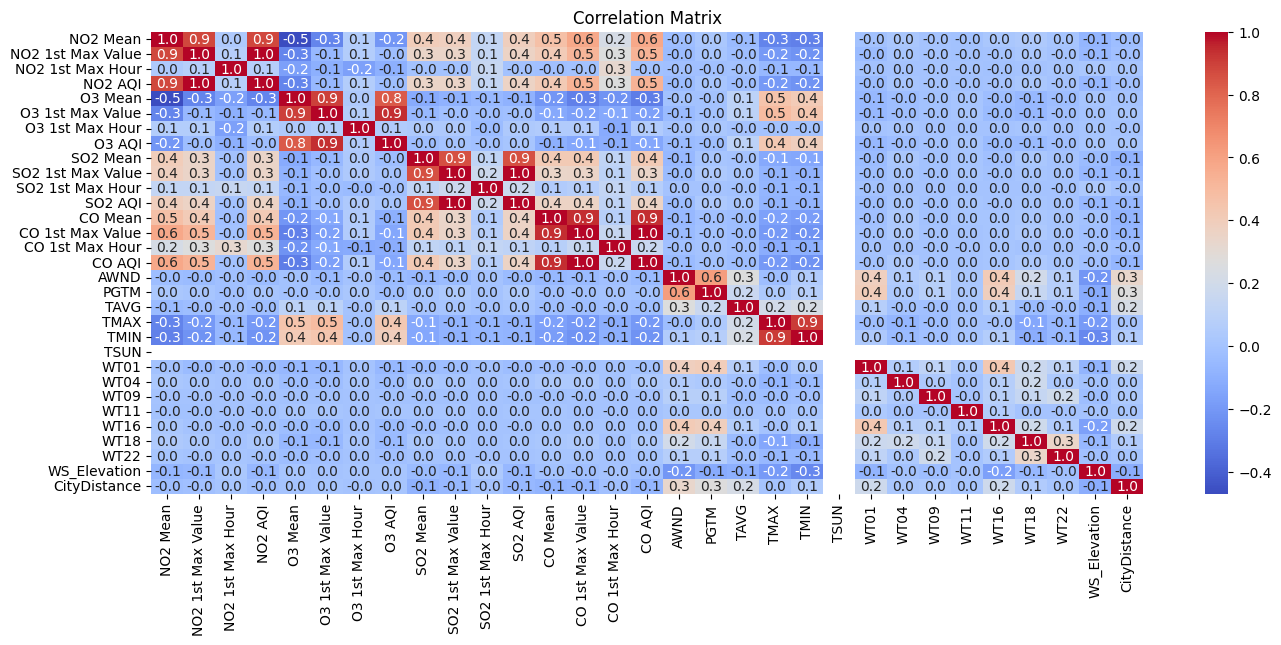

In [63]:
# Create a visualisation of correlation matrix using seaborn heatmap with negatives being reds and positives being blues
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")

plt.title('Correlation Matrix')
plt.show()


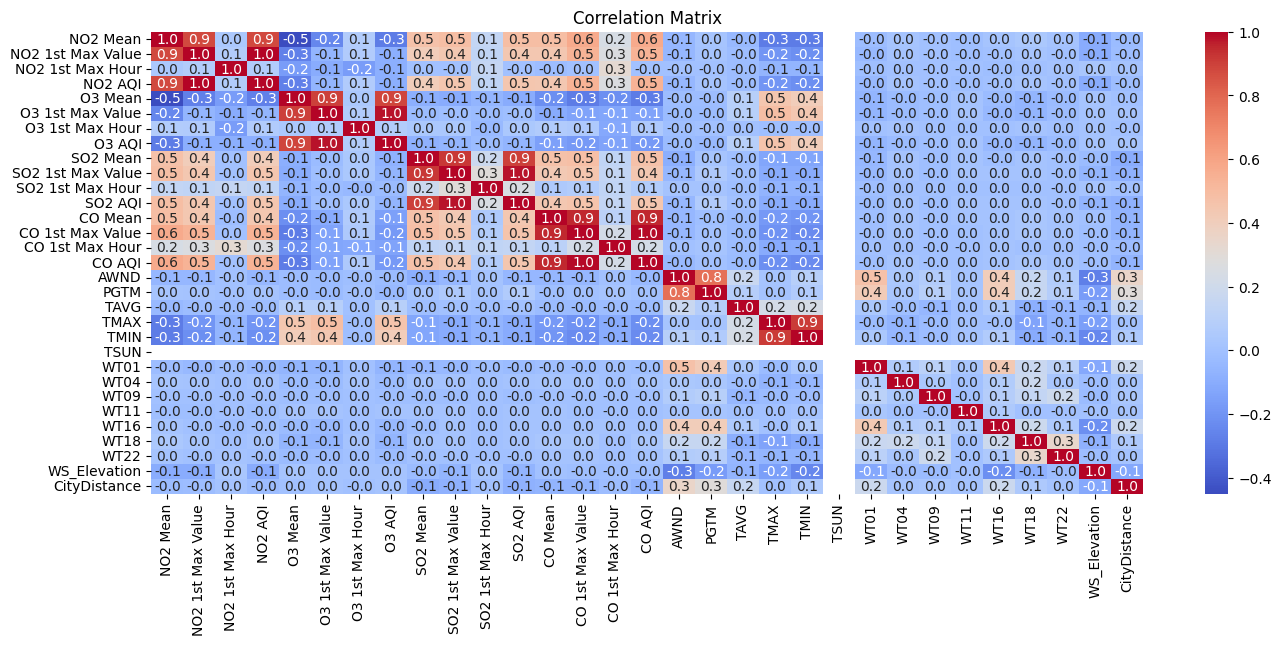

In [64]:
# Use scikit learn to apply transformations to the data to standardise the data and correct skewness
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# create a list of numeric columns
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
# drop WS_Latitude, WS_Longitude from numeric_columns
numeric_columns = numeric_columns.drop(['WS_Latitude', 'WS_Longitude'])

# create a list of columns with skewness greater than 1
skewness = merged_data[numeric_columns].skew()
skewness = skewness[skewness > 1]
skewness

# apply power transformer to columns with skewness greater than 1
power_transformer = PowerTransformer()
merged_data[skewness.index] = power_transformer.fit_transform(merged_data[skewness.index])

# apply standard scaler to all numeric columns
scaler = StandardScaler()
merged_data[numeric_columns] = scaler.fit_transform(merged_data[numeric_columns])

# perform correlation matrix again
correlation_matrix2 = merged_data[numeric_columns].corr()
correlation_matrix2 = correlation_matrix2.round(2)
correlation_matrix2

# Create a visualisation of correlation matrix using seaborn heatmap with negatives being reds and positives being blues
plt.figure(figsize=(16, 6))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix')
plt.show()







In [66]:
# preform a linear regression on the data to predict the pollution level
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# create a list of numeric columns
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
# drop WS_Latitude, WS_Longitude from numeric_columns
numeric_columns = numeric_columns.drop(['WS_Latitude', 'WS_Longitude'])

# split data into features and target
X = merged_data[numeric_columns]
y = merged_data['NO2 AQI']

# split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predict the target using the model
y_pred = model.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
mse

# save the model
import joblib

joblib.dump(model, 'Outputs/Linear_Regression_Model.pkl')

mse



2.57253080278133e-30

In [ ]:
# load the model
model = joblib.load('Outputs/Linear_Regression_Model.pkl')

# predict the target using the model
y_pred = model.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
mse

# create a dataframe of the coefficients
coefficients = pd.DataFrame(model.coef_, index=numeric_columns, columns=['Coefficient'])
coefficients

# create a dataframe of the intercept
intercept = pd.DataFrame([model.intercept_], index=['Intercept'], columns=['Value'])
intercept

# save the coefficients and intercept to csv
coefficients.to_csv('Outputs/Coefficients.csv')
intercept.to_csv('Outputs/Intercept.csv')